In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

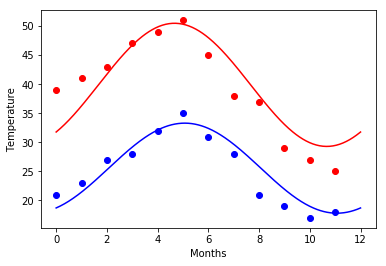

In [2]:
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 
months = np.arange(12)
from scipy import optimize
def func(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(func, months,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(func, months,
                                      Min, [-40, 20, 0]) 

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months,Max, 'ro')
plt.plot(days, func(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, func(days, *res_min), 'b-')
plt.xlabel('Months')
plt.ylabel('Temperature')

plt.show()

total males :  657
total females :  388


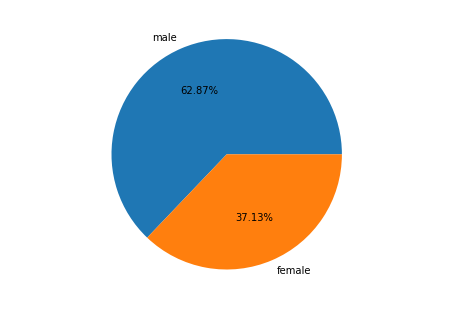

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df.head()

# check for nan values
df.isnull().sum()

# we will be using sex, fare and age column. so we only will remove nan rows correspond to these columns
# removing nan rows and check again for nan values if removed or not
df = df.dropna(subset=['sex', 'fare', 'age']).copy()
df.isnull().sum()

# divide the data rows according to male and female and print total males and females
all_males_df = df.loc[df['sex']=='male']
all_females_df = df.loc[df['sex']=='female']
print("total males : ",all_males_df.shape[0])
print("total females : ",all_females_df.shape[0])

# plotting the proportion of male and female
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
attribute_name = ['male', 'female']
data = [all_males_df.shape[0],all_females_df.shape[0]]
ax.pie(data, labels = attribute_name,autopct='%1.2f%%')
plt.show()

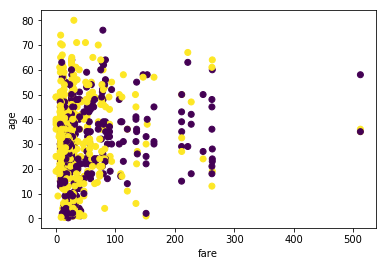

In [4]:


# scatter plot: fare as x axis and age as y axis, based on male and female
plt.scatter(df['fare'].values, df['age'].values,c=[0 if sex=='female' else 1 for sex in df['sex']])
plt.xlabel("fare")
plt.ylabel("age");
plt.show()
plt.close()
